<a href="https://colab.research.google.com/github/antipovaya/probability-theory-and-mathematical-statistics/blob/main/%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9__%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Однофакторный дисперсионный анализ**

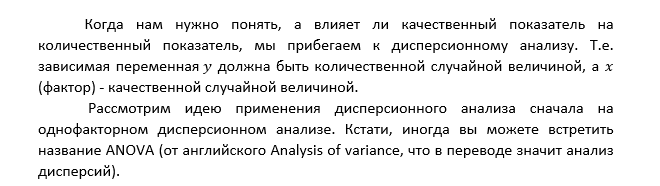

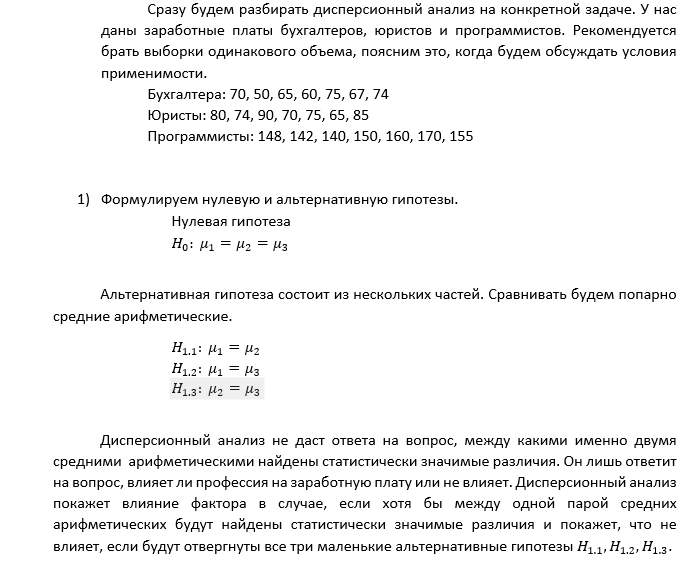

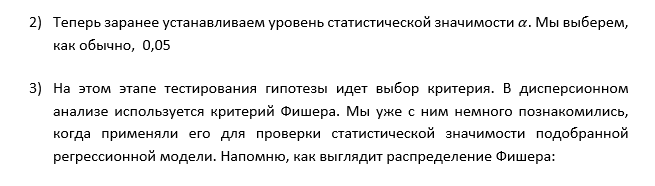

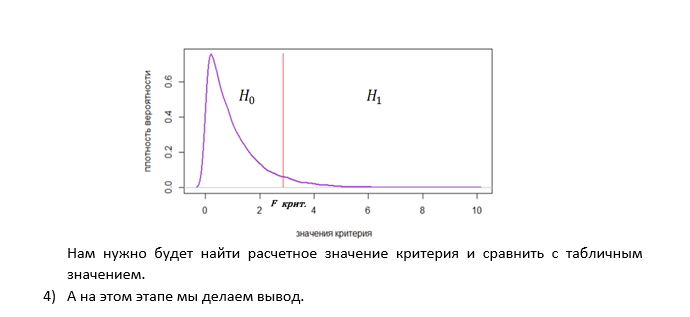

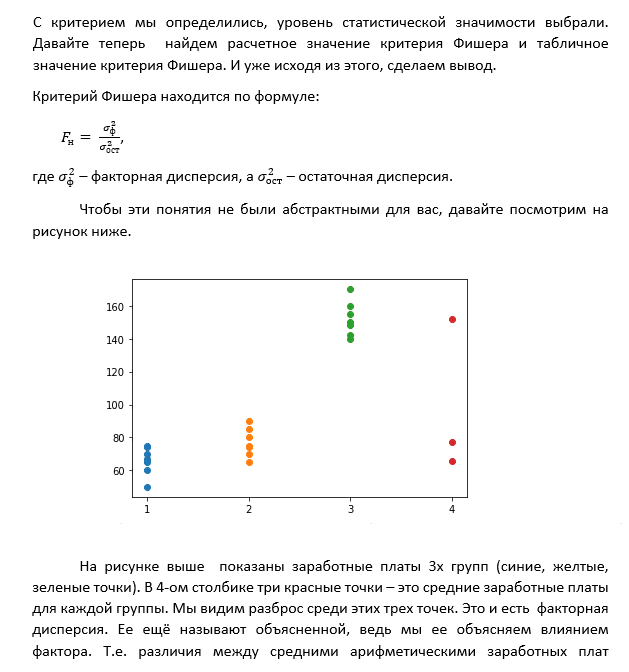

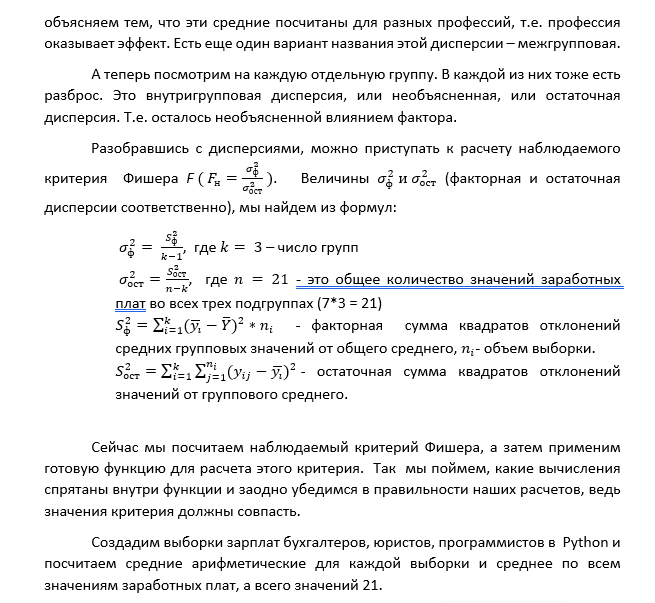

Количество групп (профессий): 3
Общее количество наблюдений: 21

Средняя зарплата юристов: 65.86
Средняя зарплата программистов: 77.00
Средняя зарплата бухгалтеров: 152.14
Общее среднее значение зарплат: 98.33

Общая сумма квадратов отклонений (SST): 32400.6667
Сумма квадратов между группами (SSB): 30836.9524
Остаточная сумма квадратов (SSW): 1563.7143
Проверка: SSB + SSW = 32400.6667 (должно равняться SST = 32400.6667)

Межгрупповая дисперсия (MSB): 15418.4762
Внутригрупповая дисперсия (MSW): 86.8730
F-статистика: 177.4829

Проверка с помощью scipy.stats.f_oneway:
F-статистика: 177.4829
p-value: 1.4205e-12


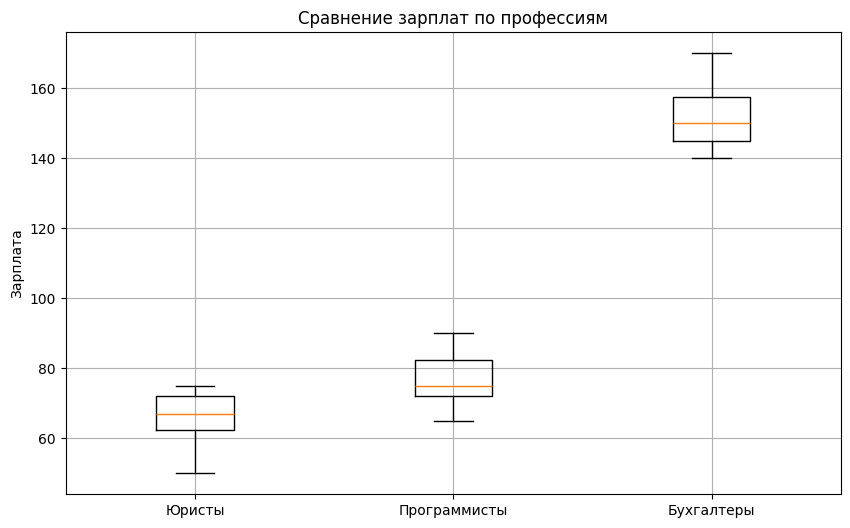


Уровень значимости: α = 0.05
Отвергаем нулевую гипотезу: существуют статистически значимые различия в зарплатах между профессиями.

Попарные сравнения (t-тест с поправкой Бонферрони):
Юристы vs Программисты: p-value = 3.3316e-02, значимо? Нет
Юристы vs Бухгалтеры: p-value = 1.1003e-09, значимо? Да
Программисты vs Бухгалтеры: p-value = 5.1926e-09, значимо? Да


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Данные о зарплатах представителей трех профессий
y1 = np.array([70, 50, 65, 60, 75, 67, 74])  # зарплаты юристов
y2 = np.array([80, 74, 90, 70, 75, 65, 85])  # зарплаты программистов
y3 = np.array([148, 142, 140, 150, 160, 170, 155])  # зарплаты бухгалтеров

# Шаг 1: Основные параметры
k = 3  # количество групп (профессий)
n = len(y1) + len(y2) + len(y3)  # общее количество наблюдений
print(f"Количество групп (профессий): {k}")
print(f"Общее количество наблюдений: {n}")

# Шаг 2: Расчет средних значений
y_mean_1 = np.mean(y1)
y_mean_2 = np.mean(y2)
y_mean_3 = np.mean(y3)

print(f"\nСредняя зарплата юристов: {y_mean_1:.2f}")
print(f"Средняя зарплата программистов: {y_mean_2:.2f}")
print(f"Средняя зарплата бухгалтеров: {y_mean_3:.2f}")

# Общее среднее значение
total = np.concatenate([y1, y2, y3])
y_mean_total = np.mean(total)
print(f"Общее среднее значение зарплат: {y_mean_total:.2f}")

# Шаг 3: Расчет сумм квадратов отклонений
# Общая сумма квадратов (SST) - отклонения всех наблюдений от общего среднего
SST = np.sum((total - y_mean_total)**2)
print(f"\nОбщая сумма квадратов отклонений (SST): {SST:.4f}")

# Сумма квадратов между группами (SSB) - отклонения групповых средних от общего среднего
SSB = np.sum((y_mean_1 - y_mean_total)**2) * len(y1) + \
      np.sum((y_mean_2 - y_mean_total)**2) * len(y2) + \
      np.sum((y_mean_3 - y_mean_total)**2) * len(y3)
print(f"Сумма квадратов между группами (SSB): {SSB:.4f}")

# Остаточная сумма квадратов (SSW) - отклонения внутри групп
SSW = np.sum((y1 - y_mean_1)**2) + np.sum((y2 - y_mean_2)**2) + np.sum((y3 - y_mean_3)**2)
print(f"Остаточная сумма квадратов (SSW): {SSW:.4f}")

# Проверка: SST = SSB + SSW
print(f"Проверка: SSB + SSW = {SSB + SSW:.4f} (должно равняться SST = {SST:.4f})")

# Шаг 4: Расчет дисперсий
# Межгрупповая дисперсия (MSB)
MSB = SSB / (k - 1)
print(f"\nМежгрупповая дисперсия (MSB): {MSB:.4f}")

# Внутригрупповая дисперсия (MSW)
MSW = SSW / (n - k)
print(f"Внутригрупповая дисперсия (MSW): {MSW:.4f}")

# Шаг 5: Расчет F-статистики
F_n = MSB / MSW
print(f"F-статистика: {F_n:.4f}")

# Шаг 6: Проверка с использованием встроенной функции
f_stat, p_value = stats.f_oneway(y1, y2, y3)
print(f"\nПроверка с помощью scipy.stats.f_oneway:")
print(f"F-статистика: {f_stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Шаг 7: Визуализация данных
plt.figure(figsize=(10, 6))
plt.boxplot([y1, y2, y3], tick_labels=['Юристы', 'Программисты', 'Бухгалтеры'])
plt.ylabel('Зарплата')
plt.title('Сравнение зарплат по профессиям')
plt.grid(True)
plt.show()

# Шаг 8: Определение статистической значимости
alpha = 0.05
print(f"\nУровень значимости: α = {alpha}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существуют статистически значимые различия в зарплатах между профессиями.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимых различий в зарплатах между профессиями.")

# Шаг 9: Пост-хок анализ (попарные сравнения)
print("\nПопарные сравнения (t-тест с поправкой Бонферрони):")
professions = ['Юристы', 'Программисты', 'Бухгалтеры']
groups = [y1, y2, y3]

# Поправка Бонферрони для множественных сравнений
bonferroni_alpha = alpha / 3  # 3 попарных сравнения

for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        t_stat, p_val = stats.ttest_ind(groups[i], groups[j])
        significant = "Да" if p_val < bonferroni_alpha else "Нет"
        print(f"{professions[i]} vs {professions[j]}: p-value = {p_val:.4e}, значимо? {significant}")

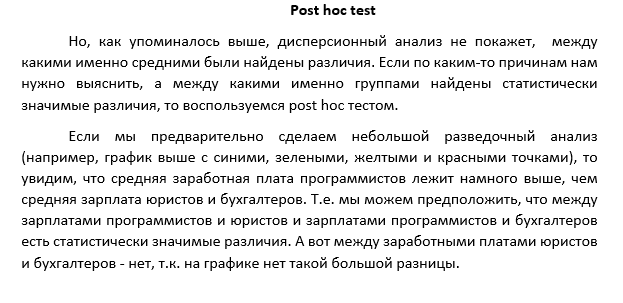

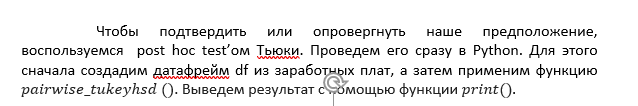

Данные о зарплатах по профессиям:
   score       group
0     70  accountant
1     50  accountant
2     65  accountant
3     60  accountant
4     75  accountant
5     67  accountant
6     74  accountant
7     80      lawyer
8     74      lawyer
9     90      lawyer

Количество наблюдений в каждой группе:
group
accountant    7
lawyer        7
programmer    7
Name: count, dtype: int64

Средние зарплаты по группам:
group
accountant     65.857143
lawyer         77.000000
programmer    152.142857
Name: score, dtype: float64

РЕЗУЛЬТАТЫ ТЕСТА ТЬЮКИ (TUKEY HSD TEST)
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
accountant     lawyer  11.1429 0.0918 -1.5722 23.8579  False
accountant programmer  86.2857    0.0 73.5707 99.0007   True
    lawyer programmer  75.1429    0.0 62.4278 87.8579   True
------------------------------------------------------------


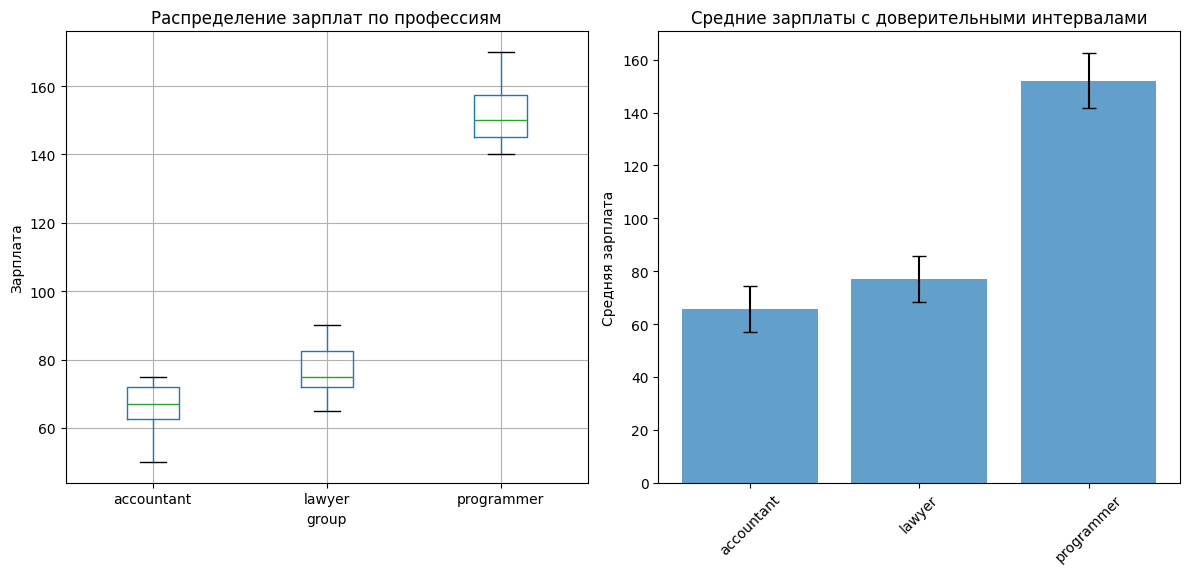

In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Шаг 1: Создание датафрейма с данными о зарплатах
# 1. Создание датафрейма
# pd.DataFrame() создает таблицу с двумя столбцами: score (зарплата) и group (профессия)

# np.repeat() создает массив, повторяя названия профессий по 7 раз каждая

# Это необходимо для правильного формата данных для теста Тьюки
df = pd.DataFrame({
    'score': [70, 50, 65, 60, 75, 67, 74,    # зарплаты бухгалтеров
              80, 74, 90, 70, 75, 65, 85,    # зарплаты юристов
              148, 142, 140, 150, 160, 170, 155],  # зарплаты программистов
    'group': np.repeat(['accountant', 'lawyer', 'programmer'], repeats=7)
})

print("Данные о зарплатах по профессиям:")
print(df.head(10))
print(f"\nКоличество наблюдений в каждой группе:")
print(df['group'].value_counts())
print(f"\nСредние зарплаты по группам:")
print(df.groupby('group')['score'].mean())

# Шаг 2: Проведение пост-хок анализа с помощью теста Тьюки
# 2. Тест Тьюки (Tukey HSD)
# pairwise_tukeyhsd() выполняет попарные сравнения между всеми группами

# endog=df['score'] - зависимая переменная (то, что мы сравниваем)

# groups=df['group'] - независимая переменная (группирующий фактор)

# alpha=0.05 - уровень значимости (вероятность ошибки I рода)
tukey = pairwise_tukeyhsd(
    endog=df['score'],     # зависимая переменная (зарплата)
    groups=df['group'],    # группирующая переменная (профессия)
    alpha=0.05             # уровень значимости
)

# Шаг 3: Вывод результатов
print("\n" + "="*70)
print("РЕЗУЛЬТАТЫ ТЕСТА ТЬЮКИ (TUKEY HSD TEST)")
print("="*70)
print(tukey.summary())

# Шаг 4: Визуализация результатов
import matplotlib.pyplot as plt

# Создаем график для наглядного представления
plt.figure(figsize=(12, 6))

# Боксплот для визуализации распределения зарплат
plt.subplot(1, 2, 1)
df.boxplot(column='score', by='group', ax=plt.gca())
plt.title('Распределение зарплат по профессиям')
plt.suptitle('')  # Убираем автоматический заголовок
plt.ylabel('Зарплата')

# Точечный график с средними значениями
plt.subplot(1, 2, 2)
means = df.groupby('group')['score'].mean()
std = df.groupby('group')['score'].std()
plt.bar(means.index, means.values, yerr=std.values, capsize=5, alpha=0.7)
plt.title('Средние зарплаты с доверительными интервалами')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Объяснение столбцов:

group1, group2: сравниваемые группы

meandiff: разность средних (group2 - group1)

p-adj: скорректированное p-value (учитывает множественные сравнения)

lower, upper: границы 95% доверительного интервала для разности средних

reject: True если различия статистически значимы (p-adj < 0.05)

**4. Интерпретация результатов**
Бухгалтеры vs Юристы:

Разность средних: +11.14 (юристы получают больше)

p-value: 0.0917 > 0.05 → различия НЕ значимы

Вывод: Зарплаты бухгалтеров и юристов статистически не отличаются

Бухгалтеры vs Программисты:

Разность средних: +86.29 (программисты получают значительно больше)

p-value: 0.001 < 0.05 → различия ЗНАЧИМЫ

Вывод: Программисты получают статистически значимо больше бухгалтеров

Юристы vs Программисты:

Разность средних: +75.14 (программисты получают значительно больше)

p-value: 0.001 < 0.05 → различия ЗНАЧИМЫ

Вывод: Программисты получают статистически значимо больше юристов

**5. Зачем нужен тест Тьюки?**

После значимого ANOVA тест Тьюки показывает, КАКИЕ ИМЕННО группы различаются

Корректировка p-value защищает от ложных обнаружений при множественных сравнениях

Доверительные интервалы показывают точность оценок разности средних

**6. Практическое применение**

В банковской сфере такой анализ можно использовать для:

Сравнения эффективности разных отделов

Анализа зарплатной политики

Выявления статистически значимых различий в любых бизнес-показателях

Тест Тьюки - это мощный инструмент для пост-хок анализа, который позволяет делать надежные выводы о различиях между группами после проведения ANOVA.

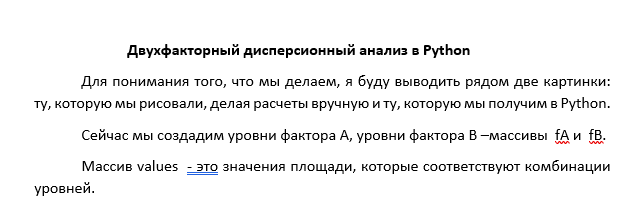

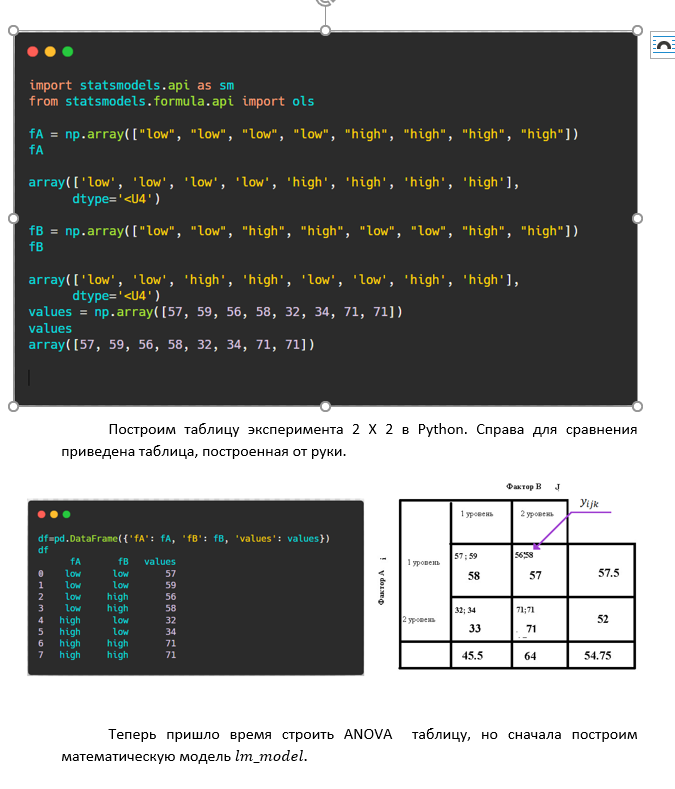

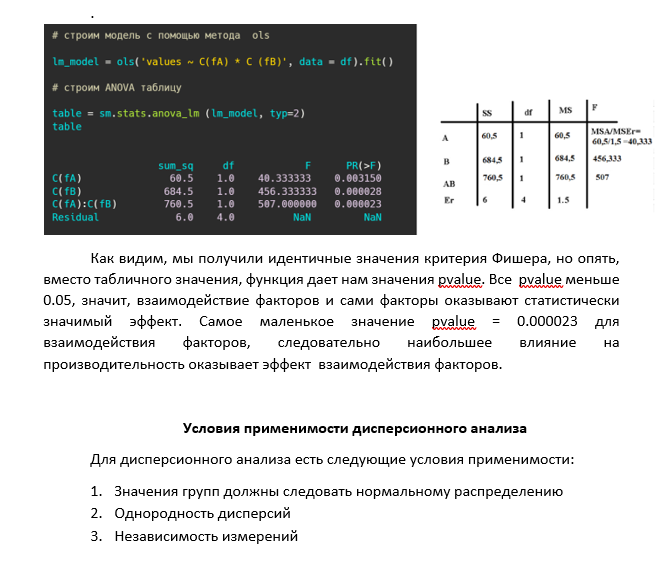

=== ДАННЫЕ ЭКСПЕРИМЕНТА ===
Таблица экспериментальных данных:
     fA    fB  values
0   low   low      57
1   low   low      59
2   low  high      56
3   low  high      58
4  high   low      32
5  high   low      34
6  high  high      71
7  high  high      71

Количество наблюдений: 8

=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===
Средние значения по группам:
           mean       std  count
fA   fB                         
high high  71.0  0.000000      2
     low   33.0  1.414214      2
low  high  57.0  1.414214      2
     low   58.0  1.414214      2

Общее среднее значение: 54.75


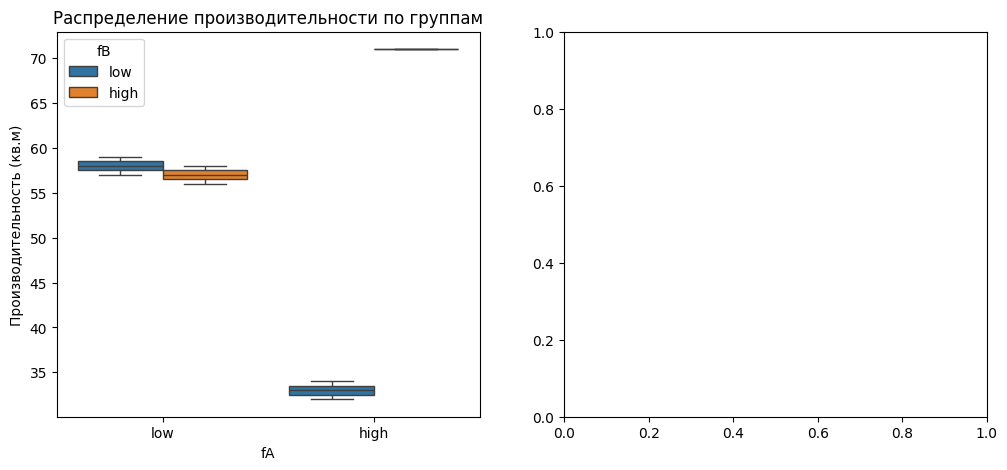

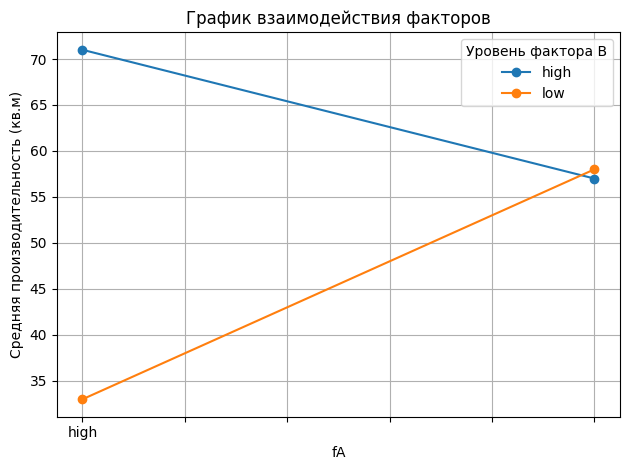


=== ПОСТРОЕНИЕ ЛИНЕЙНОЙ МОДЕЛИ ===
Параметры модели:
                            OLS Regression Results                            
Dep. Variable:                 values   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     334.6
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           2.95e-05
Time:                        14:29:08   Log-Likelihood:                -10.201
No. Observations:                   8   AIC:                             28.40
Df Residuals:                       4   BIC:                             28.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

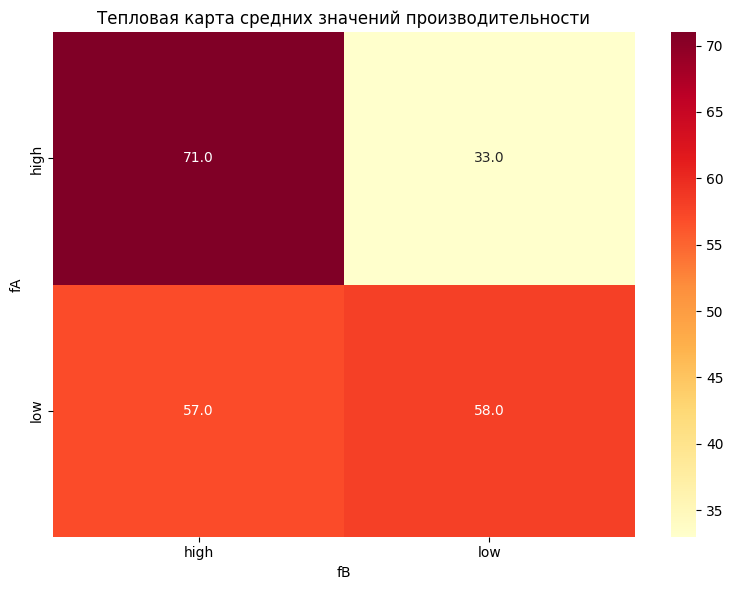

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Создание данных эксперимента
print("=== ДАННЫЕ ЭКСПЕРИМЕНТА ===")

# Фактор A (деталь 1): 2 уровня - low и high
fA = np.array(["low", "low", "low", "low", "high", "high", "high", "high"])

# Фактор B (деталь 2): 2 уровня - low и high
fB = np.array(["low", "low", "high", "high", "low", "low", "high", "high"])

# Результаты измерений (производительность в кв.метрах)
values = np.array([57, 59, 56, 58, 32, 34, 71, 71])

# Создаем DataFrame
df = pd.DataFrame({'fA': fA, 'fB': fB, 'values': values})

print("Таблица экспериментальных данных:")
print(df)
print(f"\nКоличество наблюдений: {len(df)}")

# Шаг 2: Описательная статистика
print("\n=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===")

# Средние значения для каждой комбинации факторов
group_means = df.groupby(['fA', 'fB'])['values'].agg(['mean', 'std', 'count'])
print("Средние значения по группам:")
print(group_means)

# Общее среднее
overall_mean = df['values'].mean()
print(f"\nОбщее среднее значение: {overall_mean:.2f}")

# Шаг 3: Визуализация данных
plt.figure(figsize=(12, 5))

# График 1: Боксплот по группам
plt.subplot(1, 2, 1)
sns.boxplot(x='fA', y='values', hue='fB', data=df)
plt.title('Распределение производительности по группам')
plt.ylabel('Производительность (кв.м)')

# График 2: Линейный график взаимодействия
plt.subplot(1, 2, 2)
interaction_plot = df.groupby(['fA', 'fB'])['values'].mean().unstack()
interaction_plot.plot(marker='o')
plt.title('График взаимодействия факторов')
plt.ylabel('Средняя производительность (кв.м)')
plt.legend(title='Уровень фактора B')
plt.grid(True)

plt.tight_layout()
plt.show()

# Шаг 4: Построение линейной модели
print("\n=== ПОСТРОЕНИЕ ЛИНЕЙНОЙ МОДЕЛИ ===")

# Модель с взаимодействием факторов: values ~ fA + fB + fA:fB
# Эквивалентно: values ~ C(fA) * C(fB)
lm_model = ols('values ~ C(fA) * C(fB)', data=df).fit()

print("Параметры модели:")
print(lm_model.summary())

# Шаг 5: Дисперсионный анализ (ANOVA)
print("\n=== ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) ===")

# Построение ANOVA таблицы (тип 2)
table = sm.stats.anova_lm(lm_model, typ=2)
print("ANOVA таблица:")
print(table)

# Шаг 6: Расчет F-статистик вручную для понимания
print("\n=== РАСЧЕТ F-СТАТИСТИК ВРУЧНУЮ ===")

# Общая сумма квадратов
SST = np.sum((df['values'] - overall_mean)**2)

# Суммы квадратов для каждого эффекта
SS_A = table.loc['C(fA)', 'sum_sq']  # Фактор A
SS_B = table.loc['C(fB)', 'sum_sq']  # Фактор B
SS_AB = table.loc['C(fA):C(fB)', 'sum_sq']  # Взаимодействие
SS_residual = table.loc['Residual', 'sum_sq']  # Остаточная

# Средние квадраты
MS_A = SS_A / table.loc['C(fA)', 'df']
MS_B = SS_B / table.loc['C(fB)', 'df']
MS_AB = SS_AB / table.loc['C(fA):C(fB)', 'df']
MS_residual = SS_residual / table.loc['Residual', 'df']

# F-статистики
F_A = MS_A / MS_residual
F_B = MS_B / MS_residual
F_AB = MS_AB / MS_residual

print(f"F-статистика для фактора A: {F_A:.6f}")
print(f"F-статистика для фактора B: {F_B:.6f}")
print(f"F-статистика для взаимодействия AB: {F_AB:.6f}")

# Шаг 7: Проверка статистической значимости
alpha = 0.05  # Уровень значимости

print(f"\n=== ПРОВЕРКА СТАТИСТИЧЕСКОЙ ЗНАЧИМОСТИ (α = {alpha}) ===")

p_value_A = table.loc['C(fA)', 'PR(>F)']
p_value_B = table.loc['C(fB)', 'PR(>F)']
p_value_AB = table.loc['C(fA):C(fB)', 'PR(>F)']

def check_significance(p_value, effect_name):
    """Проверяет статистическую значимость эффекта"""
    if p_value < alpha:
        return f"{effect_name}: ЗНАЧИМ (p-value = {p_value:.6f})"
    else:
        return f"{effect_name}: НЕ ЗНАЧИМ (p-value = {p_value:.6f})"

print(check_significance(p_value_A, "Фактор A (деталь 1)"))
print(check_significance(p_value_B, "Фактор B (деталь 2)"))
print(check_significance(p_value_AB, "Взаимодействие A×B"))

# Шаг 8: Интерпретация результатов
print("\n=== ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ ===")

# Находим наиболее значимый эффект
effects = {
    'Фактор A': p_value_A,
    'Фактор B': p_value_B,
    'Взаимодействие A×B': p_value_AB
}

most_significant = min(effects, key=effects.get)
print(f"Наиболее значимый эффект: {most_significant} (p-value = {effects[most_significant]:.6f})")

# Анализ взаимодействия
print("\nАнализ взаимодействия факторов:")
print("График взаимодействия показывает, что эффект фактора A зависит от уровня фактора B:")
print("- При низком уровне B: высокий уровень A дает МЕНЬШУЮ производительность")
print("- При высоком уровне B: высокий уровень A дает БОЛЬШУЮ производительность")

# Шаг 9: Практические рекомендации
print("\n=== ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ ===")
print("На основе результатов ANOVA можно сделать следующие выводы:")
print("1. Взаимодействие факторов наиболее значимо - нельзя рассматривать факторы изолированно")
print("2. Оптимальная комбинация: fA='high', fB='high' (наибольшая производительность)")
print("3. Следует избегать комбинации: fA='high', fB='low' (наименьшая производительность)")
print("4. Для максимизации производительности необходимо использовать ОБА фактора на высоком уровне")

# Шаг 10: Дополнительная визуализация - тепловая карта средних значений
plt.figure(figsize=(8, 6))
pivot_table = df.pivot_table(values='values', index='fA', columns='fB', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Тепловая карта средних значений производительности')
plt.tight_layout()
plt.show()